In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv("DATASET-balanced.csv")

In [4]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.ravel()


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


In [8]:
model = LGBMClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

[LightGBM] [Info] Number of positive: 4741, number of negative: 4681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503184 -> initscore=0.012736
[LightGBM] [Info] Start training from score 0.012736


In [9]:
# Evaluate predictions
print("********************************************")
print("Light Gradient Boosting Machine test results")
print("Accuracy score:" , accuracy_score(Y_validation, predictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_validation, predictions))
print("********************************************")
print(classification_report(Y_validation, predictions))
print("Matthews Correlation Coefficient:" , matthews_corrcoef(Y_validation, predictions))
print("********************************************")
conf_matrix = confusion_matrix(Y_validation, predictions)


********************************************
Light Gradient Boosting Machine test results
Accuracy score: 0.9915110356536503
Confusion Matrix:
[[1202    6]
 [  14 1134]]
********************************************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1208
           1       0.99      0.99      0.99      1148

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Matthews Correlation Coefficient: 0.9830308185051143
********************************************


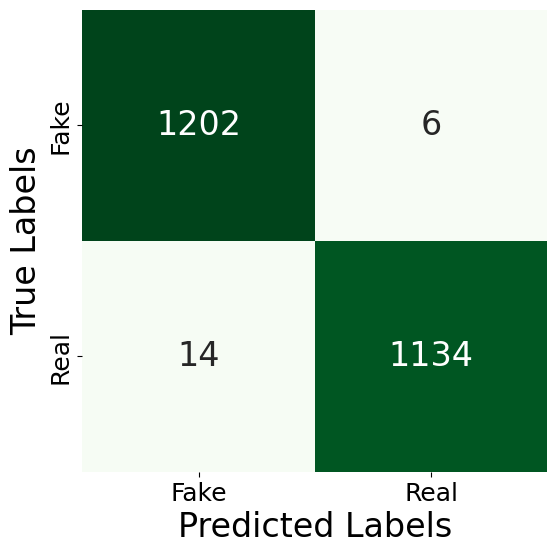

In [11]:
class_labels = ["Fake", "Real"]
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=class_labels,
            yticklabels=class_labels, cbar=False,
            annot_kws={"size": 24})
plt.xlabel('Predicted Labels' , fontsize=24)
plt.ylabel('True Labels', fontsize=24)
plt.xticks(fontsize=18)  # Set the font size for x-axis tick labels
plt.yticks(fontsize=18) 
plt.savefig("conf_mat_lgbm.svg")